Sandra Sabu
2022BCY0041


Problem 1:
To perform various data transformation operations, feature scaling, and feature creation to prepare
the dataset for data modelling. Mall Customers Dataset, which contains features like "Age,"
"Annual Income (k$)," "Spending Score (1-100)," and "Gender."

In [2]:
#importing neccessary libraries
import pandas as pd
import numpy as np
#for graphs
import matplotlib.pyplot as plt
import seaborn as sns
#for

In [3]:
#for scaling libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
#for statitics
from scipy import stats

In [4]:
#to read dataset
df=pd.read_csv('/content/drive/MyDrive/ML/Lab 6 - Mall_Customers.csv')

In [5]:
df.info()
# to know the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()
#to view statistical summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#to know the first few row of the dataset
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. Scaling and Normalization:
o Apply Min-Max Scaling and Z-Score Standardization on the "Annual Income" and
"Spending Score" features.
o Compare the transformed data using histograms or box plots (visualizing original vs
scaled data).

In [8]:
#define feature
f= ['Annual Income (k$)', 'Spending Score (1-100)']

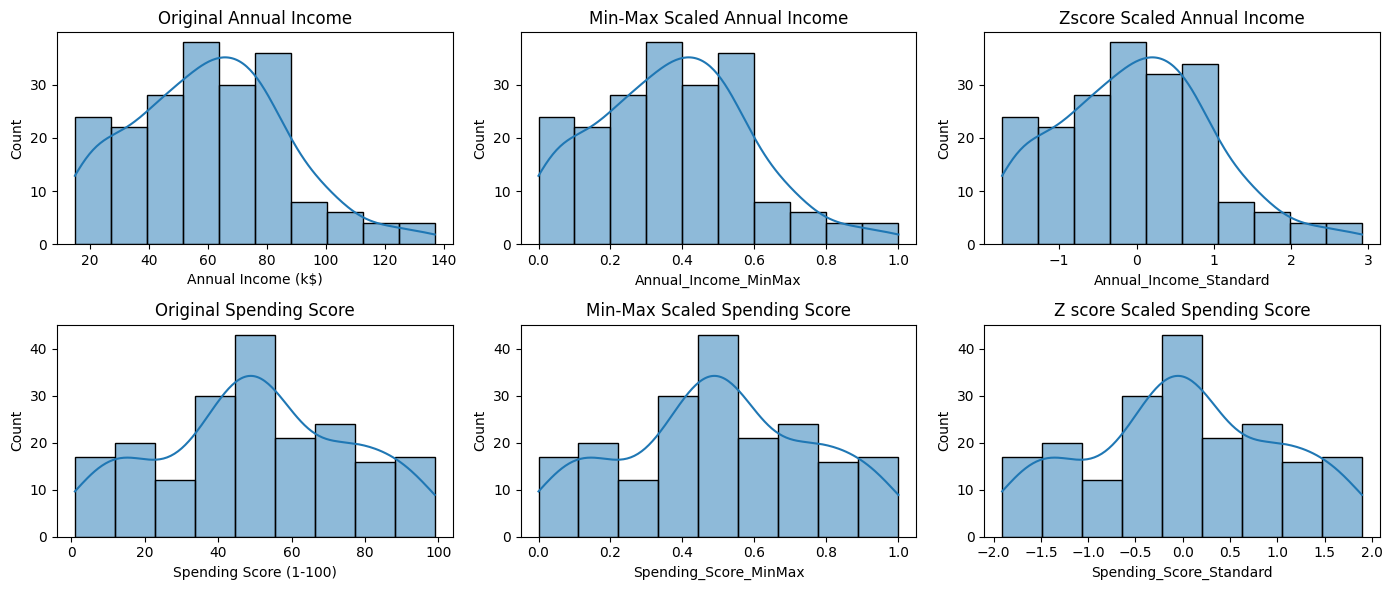

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling using MinMaxScaler
scaler = MinMaxScaler()

df['Annual_Income_MinMax'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending_Score_MinMax'] = scaler.fit_transform(df[['Spending Score (1-100)']])

# Z-Score Standardization using stats.zscore using scipy
df['Annual_Income_Standard'] = stats.zscore(df['Annual Income (k$)'])
df['Spending_Score_Standard'] = stats.zscore(df['Spending Score (1-100)'])

# Plotting the original and scaled data
plt.figure(figsize=(14, 6))

# Original Annual Income
plt.subplot(2, 3, 1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Original Annual Income')

# Min-Max Scaled Annual Income
plt.subplot(2, 3, 2)
sns.histplot(df['Annual_Income_MinMax'], kde=True)
plt.title('Min-Max Scaled Annual Income')

#z-score Scaled Annual Income
plt.subplot(2, 3, 3)
sns.histplot(df['Annual_Income_Standard'], kde=True)
plt.title('Zscore Scaled Annual Income')

# Original Spending Score
plt.subplot(2, 3, 4)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Original Spending Score')

# Min-Max Scaled Spending Score
plt.subplot(2, 3, 5)
sns.histplot(df['Spending_Score_MinMax'], kde=True)
plt.title('Min-Max Scaled Spending Score')

# Zscore Scaled Spending Score
plt.subplot(2, 3, 6)
sns.histplot(df['Spending_Score_Standard'], kde=True)
plt.title('Z score Scaled Spending Score')
plt.tight_layout()
plt.show()


# #conclusion
we did min max scaling and z score normalization and found that not much change in data

2)Logarithmic and Exponential Transformations:
o Perform logarithmic transformation on the skewed "Annual Income" data to reduce
skewness.
o Apply an exponential transformation on the "Age" column, and plot the original vs
transformed data.

Text(0.5, 1.0, 'Logarithmic transformation')

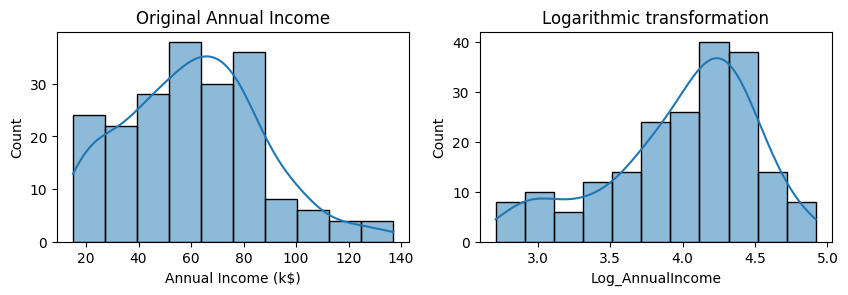

In [10]:
#logarithmic transformation
df['Log_AnnualIncome']=np.log(df['Annual Income (k$)'])

#plot the graph

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.title('Original Annual Income')
plt.subplot(2,2,2)
sns.histplot(df['Log_AnnualIncome'],kde=True)
plt.title('Logarithmic transformation')



In [12]:

#exponential transformation on Age
df['Exp_Age']=np.exp(df['Age']/100)
# do as /100 othewise system gets crashed)

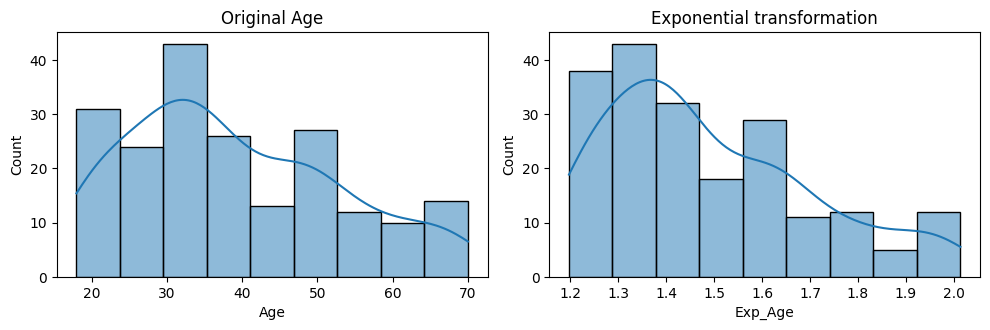

In [13]:
#plot for exponential transforation
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(df['Age'],kde=True)
plt.title('Original Age')
plt.subplot(2,2,2)
sns.histplot(df['Exp_Age'],kde=True)
plt.title('Exponential transformation')
plt.tight_layout()
plt.show()

Conclusion


*   we did logarithmic transformation on Annual Income to reduce its value
*   we did exponential value on Age to get increase





Box-Cox Transformations:
o Apply Box-Cox Transformation on the "Spending Score" to normalize the data
distribution

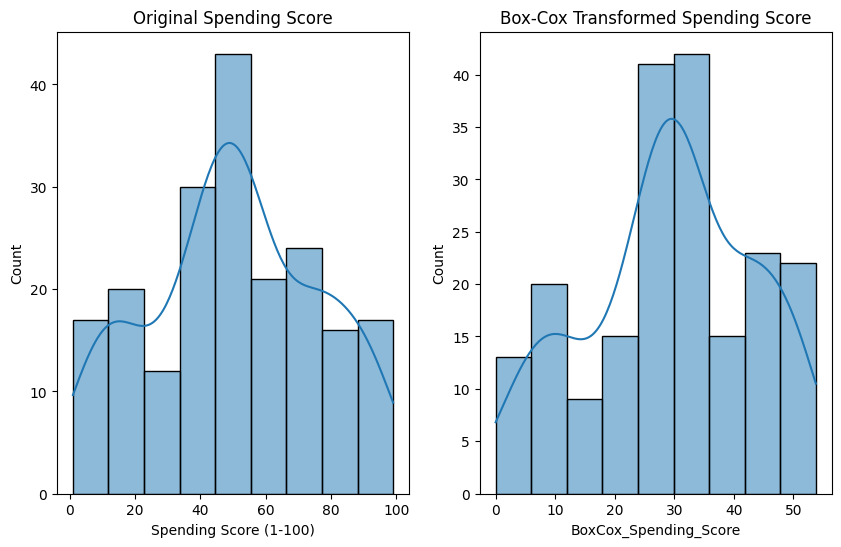

In [17]:
# Applying Box-Cox transformation on Spending Score
df['BoxCox_Spending_Score'], x_ = stats.boxcox(df['Spending Score (1-100)'])
# Plotting Box-Cox transformation result
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Original Spending Score')
plt.subplot(1 , 2, 2)
sns.histplot(df['BoxCox_Spending_Score'], kde=True)
plt.title('Box-Cox Transformed Spending Score')
plt.show()


Conclusion
Did box-cox transformation on spending score

Discretization and Binning:
o Perform binning on the "Age" feature, creating age groups (e.g., <20, 20-30, 30-40,>40)

In [23]:
# Binning Age into groups
bins = [0, 20, 30, 40, 100]
labels = ['<20', '20-30', '30-40', '>40']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_MinMax,Spending_Score_MinMax,Annual_Income_Standard,Spending_Score_Standard,Log_AnnualIncome,Exp_Age,BoxCox_Spending_Score,Age_Group
0,1,Male,19,15,39,0.000000,0.387755,-1.738999,-0.434801,2.708050,1.209250,24.128630,<20
1,2,Male,21,15,81,0.000000,0.816327,-1.738999,1.195704,2.708050,1.233678,45.328724,20-30
2,3,Female,20,16,6,0.008197,0.051020,-1.700830,-1.715913,2.772589,1.221403,4.135102,<20
3,4,Female,23,16,77,0.008197,0.775510,-1.700830,1.040418,2.772589,1.258600,43.408854,20-30
4,5,Female,31,17,40,0.016393,0.397959,-1.662660,-0.395980,2.833213,1.363425,24.667864,30-40


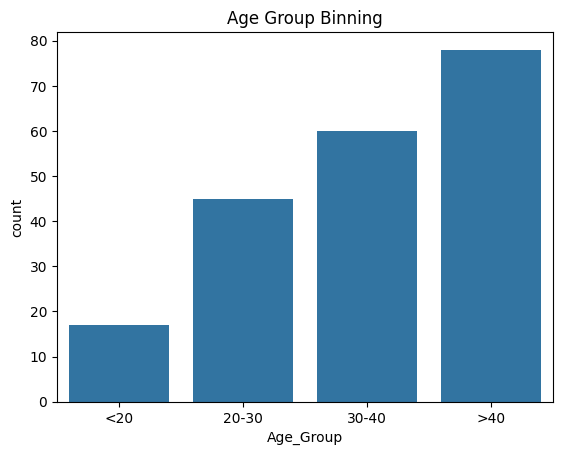

In [24]:
# Plotting the Age groups
sns.countplot(x='Age_Group', data=df)
plt.title('Age Group Binning')
plt.show()

Conclusion
we did binning and grouped into certain groups

5) Encoding Categorical Data:
o Use Label Encoding for the "Gender" column.
o Explore One-Hot Encoding to create binary columns for "Gender" and analyze how
this affects data.


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding Gender
le = LabelEncoder()
df['Gender_Label'] = le.fit_transform(df['Genre'])

# One-Hot Encoding Gender
df = pd.get_dummies(df, columns=['Genre'])

# Display the transformed data
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_MinMax,Spending_Score_MinMax,Annual_Income_Standard,Spending_Score_Standard,Log_AnnualIncome,Exp_Age,BoxCox_Spending_Score,Age_Group,Gender_Label,Genre_Female,Genre_Male
0,1,19,15,39,0.000000,0.387755,-1.738999,-0.434801,2.708050,1.209250,24.128630,<20,1,False,True
1,2,21,15,81,0.000000,0.816327,-1.738999,1.195704,2.708050,1.233678,45.328724,20-30,1,False,True
2,3,20,16,6,0.008197,0.051020,-1.700830,-1.715913,2.772589,1.221403,4.135102,<20,0,True,False
3,4,23,16,77,0.008197,0.775510,-1.700830,1.040418,2.772589,1.258600,43.408854,20-30,0,True,False
4,5,31,17,40,0.016393,0.397959,-1.662660,-0.395980,2.833213,1.363425,24.667864,30-40,0,True,False


We perfomed one hot encoding


6. Feature Engineering:
o Create a new feature "Income-to-Spending Ratio" by dividing "Annual Income" by
"Spending Score."
o Generate a binary flag feature, indicating whether a customer has an "Annual
Income" greater than $70k.



In [28]:
# Create Income-to-Spending Ratio
df['Income_to_Spending_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']

# Generate a binary flag for Annual Income > 70k
df['High_Income_Flag'] = (df['Annual Income (k$)'] > 70).astype(int)

# Display the new features
df[['Income_to_Spending_Ratio', 'High_Income_Flag']].head()


,Income_to_Spending_Ratio,High_Income_Flag
0,0.384615,0
1,0.185185,0
2,2.666667,0
3,0.207792,0
4,0.425000,0


7. Handling Outliers:
o Detect and remove outliers using the Interquartile Range (IQR) method for the
"Annual Income" and "Spending Score" columns.
o Visualize outliers before and after removal using box plots.

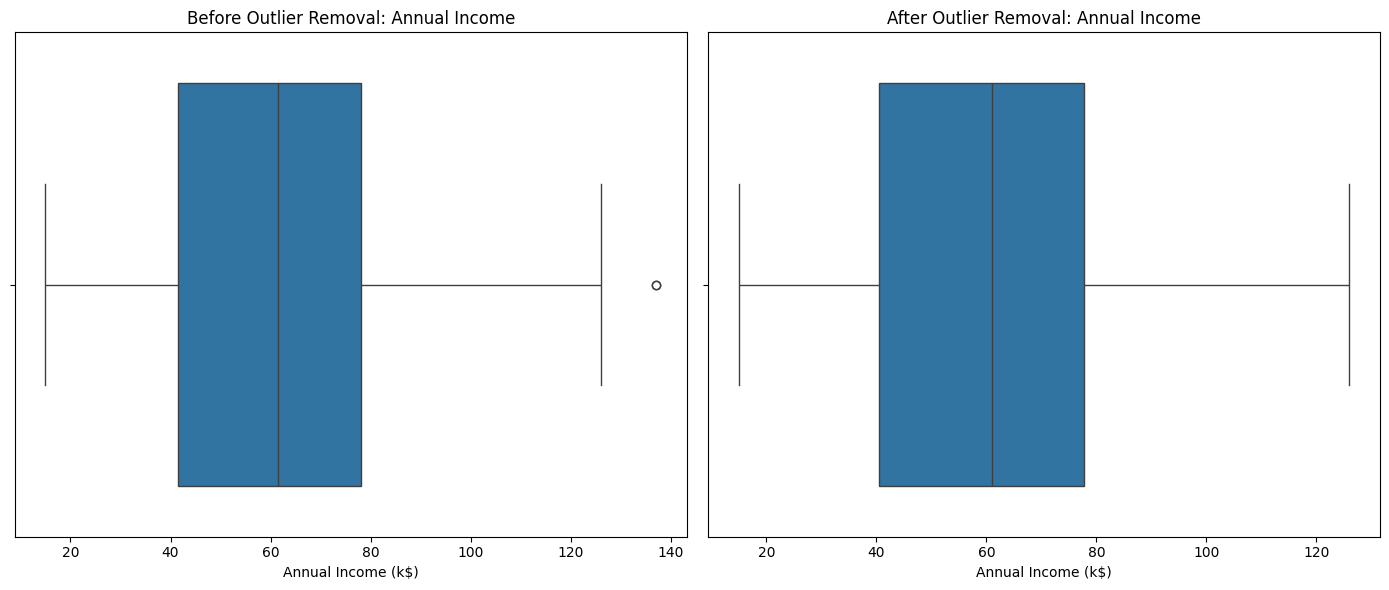

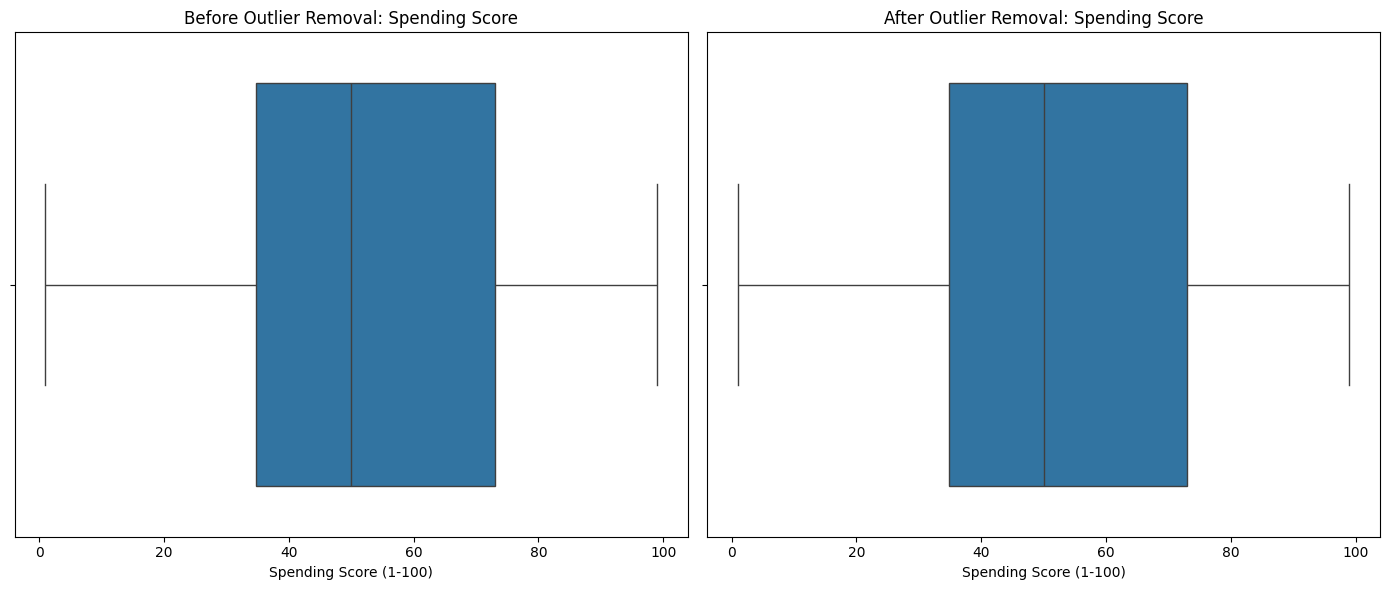

In [34]:
# Define IQR method to detect outliers
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]

# Removing outliers from Annual Income and Spending Score
df_cleaned = df.copy()
df_cleaned['Annual Income (k$)'] = remove_outliers(df['Annual Income (k$)'])
df_cleaned['Spending Score (1-100)'] = remove_outliers(df['Spending Score (1-100)'])

# checking outliers before and after removal
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Before Outlier Removal: Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Annual Income (k$)'])
plt.title('After Outlier Removal: Annual Income')

plt.tight_layout()
plt.show()

#checking outliners before and after removal
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Before Outlier Removal: Spending Score')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Spending Score (1-100)'])
plt.title('After Outlier Removal: Spending Score')

plt.tight_layout()
plt.show()


**conclusion **
did outlier detection using IQR method
